# Algorithmes de Seconde - 2019

# Partie "Statistiques et Probabilités"

## 1. Pour des données réelles ou issues d’une simulation, lire et comprendre une fonction écrite en Python renvoyant la moyenne $m$, l’écart type $s$, et la proportion d’éléments appartenant à $[m-2s,m+2s]$.

On peut procéder en deux temps:

- D'abord créer une fonction permettant de simuler une expérience aléatoire
- Créer une fonction répondant renvoyant la moyenne $m$, l’écart type $s$, et la proportion d’éléments appartenant à $[m-2s,m+2s]$. Cette fonction peut également être utilisée pour toutes les listes de données numériques réelles.

On choisit $n$ personnes dont on mesure le taux de glycémie dans le sang (qui suit la loi normale d'espérance $1$ $g.L^{-1}$ et d'écart-type $0,1$ $g.L^{-1}$ ce qui permet de simuler une liste et de la donner *brute* aux élèves).

In [52]:
from math import *
from random import *
import numpy.random as alea

def TauxGlycemie(n):
    Liste = []
    for compteur in range(n):
        glycemie = alea.randn()*0.1+1  # randn() permet de simuler la loi normale centrée réduite
        Liste = Liste + [glycemie]
    return Liste

def Moyenne(Liste):
    n = len(Liste)  # Longueur de la liste
    somme = 0
    for t in Liste:
        somme = somme + t
    moyenne = somme / n
    return moyenne

def Ecarttype(Liste):
    n = len(Liste)
    somme_ecart_moyenne = 0
    m = Moyenne(Liste)
    for t in Liste:
        somme_ecart_moyenne = somme_ecart_moyenne + (t-m)**2
    variance = somme_ecart_moyenne / n
    ecart_type = sqrt(variance)
    return ecart_type

def Parametres(Liste):
    m = Moyenne(Liste)
    s = Ecarttype(Liste)
    
    nombre_dans_intervalle = 0
    for t in Liste:
        if m-2*s < t and t < m+2*s:
            nombre_dans_intervalle = nombre_dans_intervalle + 1
    frequence = nombre_dans_intervalle / len(Liste)
    
    return m, s, frequence

In [54]:
Parametres(TauxGlycemie(5000))

(1.0005852058802556, 0.10017475913062676, 0.954)

**Remarque:** Il est intéressant également d'ajouter une représentation graphique à la fonction précédente pour renforcer le côté "exceptionnel" des valeurs à l'extérieur de l'intervalle $[m-2s;m+2s]$.

In [61]:
from math import *
from random import *
import numpy.random as alea
import matplotlib.pyplot as plt

def TauxGlycemie(n):
    Liste = []
    for compteur in range(n):
        glycemie = alea.randn()*0.1+1  # randn() permet de simuler la loi normale centrée réduite
        Liste = Liste + [glycemie]
    return Liste

def Moyenne(Liste):
    n = len(Liste)  # Longueur de la liste
    somme = 0
    for t in Liste:
        somme = somme + t
    moyenne = somme / n
    return moyenne

def Ecarttype(Liste):
    n = len(Liste)
    somme_ecart_moyenne = 0
    m = Moyenne(Liste)
    for t in Liste:
        somme_ecart_moyenne = somme_ecart_moyenne + (t-m)**2
    variance = somme_ecart_moyenne / n
    ecart_type = sqrt(variance)
    return ecart_type

def Parametres2(Liste):
    m = Moyenne(Liste)
    s = Ecarttype(Liste)
    
    nombre_dans_intervalle = 0
    for t in Liste:
        if m-2*s < t and t < m+2*s:
            nombre_dans_intervalle = nombre_dans_intervalle + 1
    frequence = nombre_dans_intervalle / len(Liste)
    
    Liste_X = range(1,len(Liste)+1)
    Liste_Y = Liste
    
    plt.plot(Liste_X,Liste_Y,"b.")
    plt.plot((0,len(Liste)+1),(m,m),"g")
    plt.plot((0,len(Liste)+1),(m-2*s,m-2*s),"r")
    plt.plot((0,len(Liste)+1),(m+2*s,m+2*s),"r")
    plt.show()
    
    return m, s, frequence

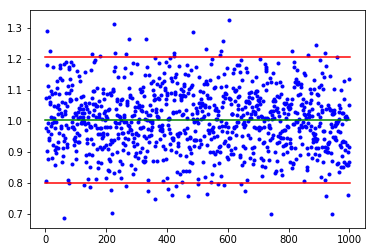

(1.0026057656944345, 0.1017183783349827, 0.956)

In [62]:
Parametres2(TauxGlycemie(1000))

------------------

### 2. Lire et comprendre une fonction Python renvoyant le nombre ou la fréquence de succès dans un échantillon de taille $n$ pour une expérience aléatoire à deux issues.

On considère une expérience aléatoire à deux issues dont le succés à pour probabilité $p$. On répète cette expérience aléatoire $n$ fois.
On peut écrire la fonction renvoyant la fréquence de succès en modifiant la fin de la fonction renvoyant le nombre de succès ou alors appeler cette fonction.

In [1]:
from random import *

def nombre_succes(n,p):
    nb_succes = 0
    for compteur in range(n):
        if random()<p:
            nb_succes = nb_succes + 1
    return nb_succes

def frequence_succes(n,p):
    return nombre_succes(n,p)/n


In [3]:
frequence_succes(1000,0.7)

0.71

------------------

### 3. Observer la loi des grands nombres à l’aide d’une simulation sur Python ou tableur.

On considère un dé à six faces dont la face 6 a été remplacée par 1. On souhaite observer la fréquence de 1 au fur et à mesure de la répétition d'épreuves. 

**Remarque:** Plutôt que d'utiliser la fonction *random()*, on peut utiliser la fonction *choice()* qui s'avère très explicite pour les élèves.

In [9]:
import matplotlib.pyplot as plt
from random import *

def de_truque():
    DE = [1,1,2,3,4,5]
    return choice(DE)
    
def representation_graphique(n):
    Liste_X=[0]
    Liste_Y=[0]
    nb_succes = 0
    for compteur in range(1,n+1):
        Liste_X = Liste_X + [compteur]
        if de_truque()==1:
            nb_succes = nb_succes + 1
        Liste_Y = Liste_Y + [nb_succes / compteur]
    plt.plot(Liste_X,Liste_Y,'b.')
    plt.grid()
    plt.show()

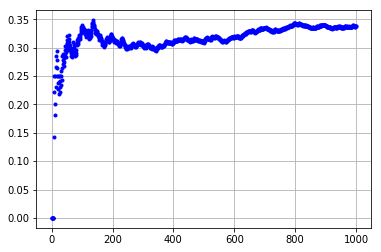

In [12]:
representation_graphique(1000)

**Remarque:** Il est intéressant de montrer la stabilisation de manière "dynamique" en utilisant l'animation de matplotlib. Bien évidemment, cet algorithme est à destination du professeur, pas de l'élève.

Penser à choisir la valeur de $N$ nombre d'expériences aléatoires à réaliser.

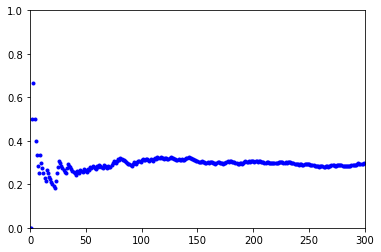

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from random import *

from IPython.display import HTML

###########
N = 300   # Nombre d'expériences aléatoires à réaliser
###########

def de_truque():
    DE = [1,1,2,3,4,5]
    return choice(DE)
    
def frequences(n):
    Liste_Y=[0]
    nb_succes = 0
    for compteur in range(1,n+1):
        if de_truque()==1:
            nb_succes = nb_succes + 1
        Liste_Y = Liste_Y + [nb_succes / compteur]
    return Liste_Y

fig, ax = plt.subplots()
xdata, ydata = [], []
points, = plt.plot([], [], 'b.')

Liste_a_representer = frequences(N)

def init():
    ax.set_xlim(0, N)
    ax.set_ylim(0, 1)
    return points,

def update(i):
    xdata.append(i)
    ydata.append(Liste_a_representer[i])
    points.set_data(xdata, ydata)
    return points,

ani = FuncAnimation(fig, update, frames=N,init_func=init, blit=True)
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())